In [10]:
import pandas as pd
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [101]:
ds = load_1minute_fx_bars('EURUSD',2012)['close']['2012']

In [102]:
ds2 = load_1minute_fx_bars('XAUGBP',2012)['close']['2012']

In [103]:
ds2.head()

ts
2012-01-02 18:04:00    1010.87
2012-01-02 18:05:00    1010.65
2012-01-02 18:06:00    1010.72
2012-01-02 18:07:00    1010.49
2012-01-02 18:08:00    1009.98
Name: close, dtype: float64

In [153]:
def masig(x, lp, sp):
    volp = lp*5
    lma = x.rolling(lp).mean()
    sma = x.rolling(sp).mean()
    return np.tanh(10000 * (sma - lma) * lma.rolling(volp).std() / (np.sqrt(lp) *sma.rolling(volp).std()))

def ewmasig(x, lp, sp):
    volp = lp*5
    lma = x.ewm(span=lp).mean()
    sma = x.ewm(span=sp).mean()
    return np.tanh(15000 * (sma - lma) * lma.ewm(volp).std() / (np.sqrt(lp) *sma.ewm(volp).std()))

In [154]:
def normalise_price(p, vol_adjust=None):
    px = logreturn(p, p.shift(1)).cumsum()
    if vol_adjust:
        px = px / ewm_vol(px, com=vol_adjust)
    return px

def ewm_vol(p,com=10000):
    return p.diff().ewm(com, min_periods=com).std()

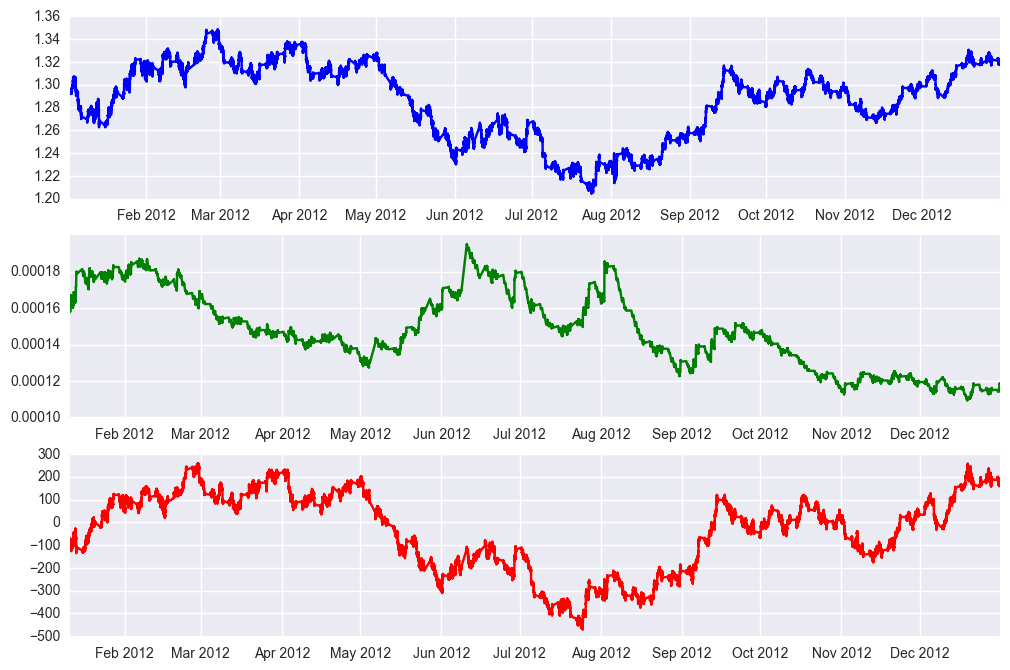

In [155]:
fig, ax = plt.subplots(3, figsize=(12,8))
ax[0].plot(ds,'b-')
ax[1].plot(ewm_vol(normalise_price(ds)),'g-')
ax[2].plot(normalise_price(ds,10000),'r-')


#ax[0,1].plot(ds2)
#ax[1,1].plot(normalise_price(ds2))

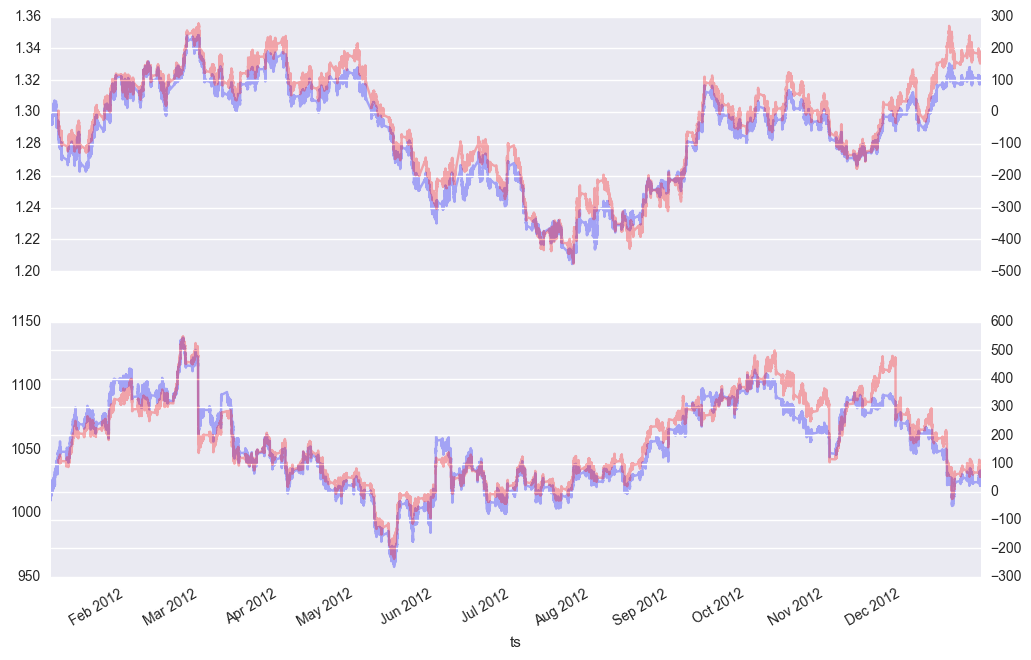

In [160]:
vol_window = 24*60*3
fig, ax = plt.subplots(2, figsize=(12,8))

ds.plot(style='b-',ax=ax[0], alpha=0.3)
normalise_price(ds,vol_window).plot(style='r-', ax=ax[0], alpha=0.3,secondary_y=True)

ds2.plot(style='b-',ax=ax[1], alpha=0.3)
normalise_price(ds2,vol_window).plot(style='r-', ax=ax[1], alpha=0.3, secondary_y=True)


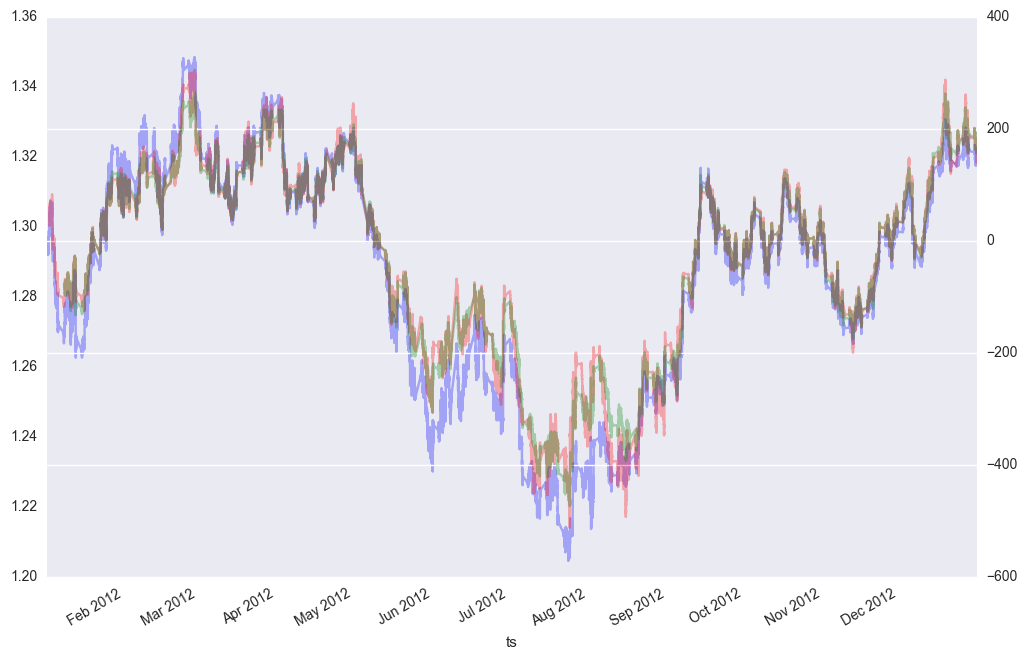

In [169]:
day = 24*60
fig = plt.figure( figsize=(12,8))

ds.plot(style='b-',alpha=0.3)
normalise_price(ds,1*day).plot(style='r-',  alpha=0.3,secondary_y=True)
normalise_price(ds,5*day).plot(style='g-',  alpha=0.3,secondary_y=True)



In [170]:
vol_window = 24*60*5
vol_window

7200

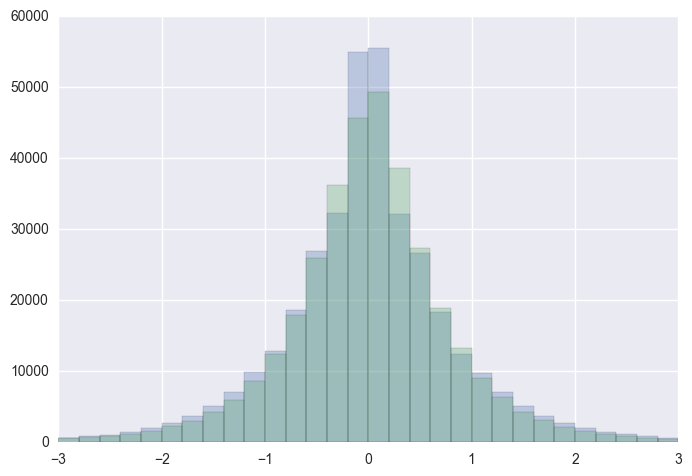

In [171]:
normalise_price(ds,vol_window).diff().hist(bins=30, range=(-3,3), alpha=0.3)
normalise_price(ds2,vol_window).diff().hist(bins=30, range=(-3,3), alpha=0.3)

In [ ]:
def preprocess(px):

    px = logreturn(ds['close'], ds['close'].shift(1)).cumsum()
            ds['px'] = px
        for period in [2,4,8,16,32,64,128,256]:
            ds['lret-{}'.format(period)] = np.tanh(logreturn(px, px.shift(period)))
            ds['ma{}-{}'.format(2*period, period)] = masig(px, 2*period, period)
            ds['ewma{}-{}'.format(2*period, period)] = ewmasig(px, 2*period, period)